In [2]:
import numpy as np
import pandas as pd

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
train_data = pd.read_csv(r'C:\Users\trash\Downloads\Kaggle Datasets\SpaceShip Titanic\train.csv')
test_data = pd.read_csv(r'C:\Users\trash\Downloads\Kaggle Datasets\SpaceShip Titanic\test.csv')
result = pd.DataFrame(test_data['PassengerId'])
test_data.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
5,0027_01,Earth,False,F/7/P,TRAPPIST-1e,31.0,False,0.0,1615.0,263.0,113.0,60.0,Karlen Ricks
6,0029_01,Europa,True,B/2/P,55 Cancri e,21.0,False,0.0,NaN,0.0,0.0,0.0,Aldah Ainserfle
7,0032_01,Europa,True,D/0/S,TRAPPIST-1e,20.0,False,0.0,0.0,0.0,0.0,0.0,Acrabi Pringry
8,0032_02,Europa,True,D/0/S,55 Cancri e,23.0,False,0.0,0.0,0.0,0.0,0.0,Dhena Pringry
9,0033_01,Earth,False,F/7/S,55 Cancri e,24.0,False,0.0,639.0,0.0,0.0,0.0,Eliana Delazarson


## 1. Checking Features that do not add any meaning or enhance our ML and removing them

In [5]:
for i in train_data.columns:
    print(train_data[i].value_counts())
    print("*"*100)

3926_01    1
4296_01    1
2831_01    1
7132_01    1
3256_01    1
          ..
3535_02    1
5854_01    1
8880_01    1
3085_01    1
6075_01    1
Name: PassengerId, Length: 8693, dtype: int64
****************************************************************************************************
Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64
****************************************************************************************************
False    5439
True     3037
Name: CryoSleep, dtype: int64
****************************************************************************************************
G/734/S     8
G/981/S     7
C/137/S     7
F/1194/P    7
E/13/S      7
           ..
G/998/P     1
F/85/P      1
G/285/S     1
A/2/P       1
G/924/S     1
Name: Cabin, Length: 6560, dtype: int64
****************************************************************************************************
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destina

In [6]:
train_data['PassengerId'].value_counts()
test_data['PassengerId'].value_counts()

6278_01    1
7349_01    1
4949_02    1
3028_01    1
6878_01    1
          ..
2794_05    1
0100_02    1
8022_01    1
8795_01    1
9266_01    1
Name: PassengerId, Length: 4277, dtype: int64

In [7]:
train_data['Transported'].value_counts()


# Dataset is Balanced

True     4378
False    4315
Name: Transported, dtype: int64

In [8]:
# As we checked the value_counts of "PassengerId" and each data is a unique identifier which is waste for our model and we 
# know "Name" feature does not add any value to our Model so REMOVING THEM BOTH

train_data = train_data.drop(['PassengerId','Name'],axis = 1)
test_data = test_data.drop(['PassengerId','Name'],axis = 1)

In [9]:
test_data.shape

(4277, 11)

## 2. Segregating Categorical and Numerical Features from Dataset

In [10]:
categorical_features = []
numerical_features = []
for i in train_data.columns:
    if train_data[i].dtype == 'O':
        categorical_features.append(i)
    elif train_data[i].dtype == 'float' or train_data[i].dtype == 'int':
        numerical_features.append(i)
        
        
print(categorical_features)
print(numerical_features)

['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']
['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']


## 3. Outlier Detection

In [11]:
train_data[numerical_features].describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


### Method 1. Checking Skewness of all Numerical Data

In [12]:
# BEST CASE - Skewness should be between -2 and +2 and Kurtosis should nearest to 3 

for i in numerical_features:
    print("Numerical feature : {0}, Skewness: {1}".format(i,train_data[i].skew()))
    print(train_data[i].describe())
    print()
    print("<>"*50)

# OBSERVATION    
# As we see "Age" is under limit but all other bumerical features are Skewed and that too in +ve direction and contains Outliers

Numerical feature : Age, Skewness: 0.41909658301471536
count    8514.000000
mean       28.827930
std        14.489021
min         0.000000
25%        19.000000
50%        27.000000
75%        38.000000
max        79.000000
Name: Age, dtype: float64

<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>
Numerical feature : RoomService, Skewness: 6.333014062092135
count     8512.000000
mean       224.687617
std        666.717663
min          0.000000
25%          0.000000
50%          0.000000
75%         47.000000
max      14327.000000
Name: RoomService, dtype: float64

<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>
Numerical feature : FoodCourt, Skewness: 7.102227852514122
count     8510.000000
mean       458.077203
std       1611.489240
min          0.000000
25%          0.000000
50%          0.000000
75%         76.000000
max      29813.000000
Name: FoodCourt, dtype: float64

<><><><>

### Method 2. Visually plotting all Numerical Features

#### HIST PLOT(KDE)

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

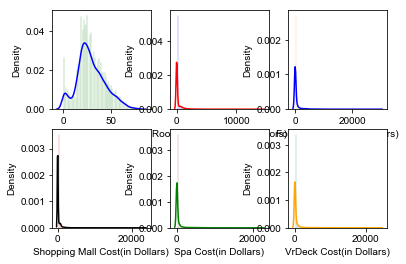

In [14]:

for i in range(len(numerical_features)):
    fig, axes = plt.subplots(2, 3)
    sns.set(palette='rainbow_r',font_scale=1.1,style = 'darkgrid',rc={"figure.figsize": [18, 12]})
    sns.distplot(train_data[numerical_features[i]],color='green',kde_kws={'color':'blue'},bins=100,axlabel='Age',ax=axes[0,0])
    sns.distplot(train_data[numerical_features[i+1]],color='blue',kde_kws={'color':'red'},bins=100,axlabel='Room Service Cost(in Dollors)',ax=axes[0,1])
    sns.distplot(train_data[numerical_features[i+2]],color='orange',kde_kws={'color':'blue'},bins=100,axlabel='Food Court Cost(in Dollors)',ax=axes[0,2])
    sns.distplot(train_data[numerical_features[i+3]],color='red',kde_kws={'color':'black'},bins=100,axlabel='Shopping Mall Cost(in Dollars)',ax=axes[1,0])
    sns.distplot(train_data[numerical_features[i+4]],color='brown',kde_kws={'color':'green'},bins=100,axlabel='Spa Cost(in Dollars)',ax=axes[1,1])
    sns.distplot(train_data[numerical_features[i+5]],color='teal',kde_kws={'color':'orange'},bins=100,axlabel='VrDeck Cost(in Dollars)',ax=axes[1,2]);
    break
    
# OBSERVATION 
# From here we see "Age" is almost Normal but all others contain Outlirs that are responsible for Right Skewness of Data.
# Going forward for next test

#### Boxplot

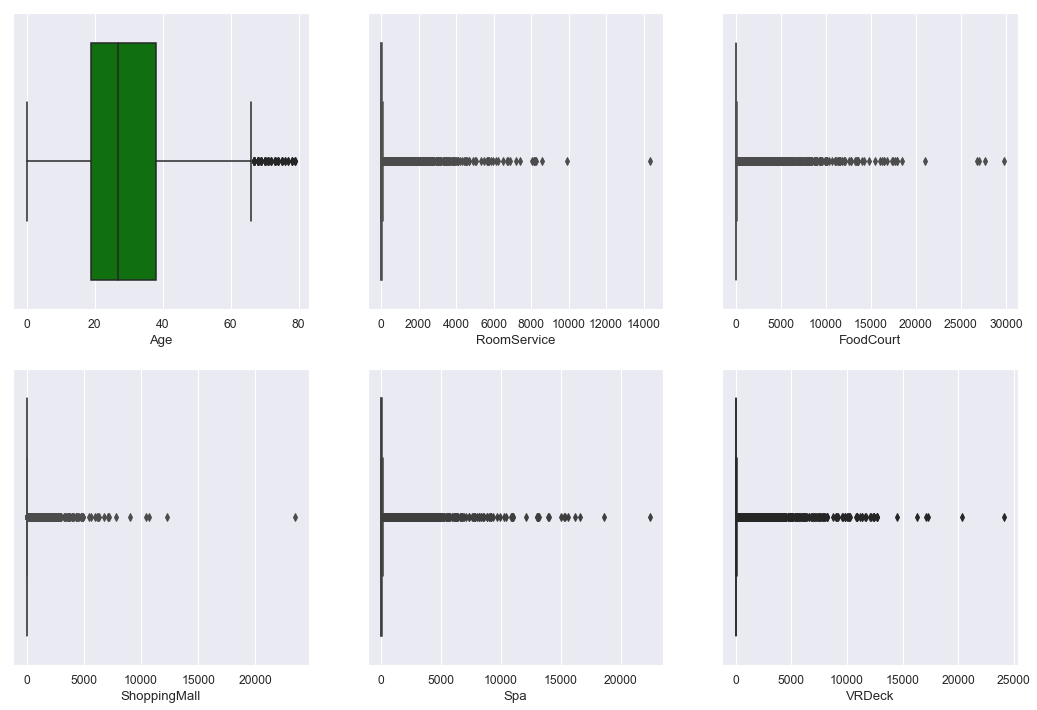

In [15]:
for i in range(len(numerical_features)):
    fig, axes = plt.subplots(2, 3)
    sns.set(palette='rainbow_r',font_scale=1.1,style = 'darkgrid',rc={"figure.figsize": [18, 12]})
    sns.boxplot(train_data[numerical_features[i]],color='green',ax=axes[0,0])
    sns.boxplot(train_data[numerical_features[i+1]],color='blue',ax=axes[0,1])
    sns.boxplot(train_data[numerical_features[i+2]],color='orange',ax=axes[0,2])
    sns.boxplot(train_data[numerical_features[i+3]],color='red',ax=axes[1,0])
    sns.boxplot(train_data[numerical_features[i+4]],color='brown',ax=axes[1,1])
    sns.boxplot(train_data[numerical_features[i+5]],color='teal',ax=axes[1,2]);
    break
    
# OBSERVATION
# As we see many data points of all features lie outside of IQR Range so most of them are OUTLIERS 

### Method 3. Performing Shapiro Wilk test to test Normality of Features

In [16]:
from scipy.stats import shapiro


for i in numerical_features:
    print("Numerical feature : {0}  ,  p-value:  {1}".format(i,shapiro(train_data[i])[1]))

    
# OBSERVATION
# From here we can see all Numerical features are showing as Normal but which is not the case here
# We go forward for more Outlier detection and Normality Test

Numerical feature : Age  ,  p-value:  1.0
Numerical feature : RoomService  ,  p-value:  1.0
Numerical feature : FoodCourt  ,  p-value:  1.0
Numerical feature : ShoppingMall  ,  p-value:  1.0
Numerical feature : Spa  ,  p-value:  1.0
Numerical feature : VRDeck  ,  p-value:  1.0


C:\Users\trash\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\trash\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\trash\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\trash\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\trash\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\trash\Anaconda3\lib\site-packages\scipy\s

### Method 4. Performing K2 Normality test for checking Normality of Features

In [17]:
from scipy.stats import normaltest

for i in numerical_features:
    print("Numerical feature : {0}  ,  p-value:  {1}".format(i,normaltest(train_data[i],nan_policy='omit')[1]))
    
# OBSERVATION
# From this test we can see all numerical features are considered as Not Gaussian as p-value is < 0.05 so we reject 
# Null Hypothesis which states "All Features are Gaussian/Normal Distributed"

Numerical feature : Age  ,  p-value:  1.6975695282745734e-51
Numerical feature : RoomService  ,  p-value:  0.0
Numerical feature : FoodCourt  ,  p-value:  0.0
Numerical feature : ShoppingMall  ,  p-value:  0.0
Numerical feature : Spa  ,  p-value:  0.0
Numerical feature : VRDeck  ,  p-value:  0.0


### OBSERVATIONS
#### 1. From all 4 test we found that all numerical features contain outliers and are not Gaussian/Normal distributed.
#### 2. Now, we have to perform OUTLIER Transform to make all features Normal or close to Normal Distribution.
#### 3. Here we have to keep the Outliers and transform them so we are not removing them so IQR and Z-Score is not performed.
#### ***We cannot perform QQPlot as data contains NAN values***

## 4. Visualizing the Complete Dataset using Seaborn and Matplotlib

### Barplot - BiVariate Analysis - Categorical features

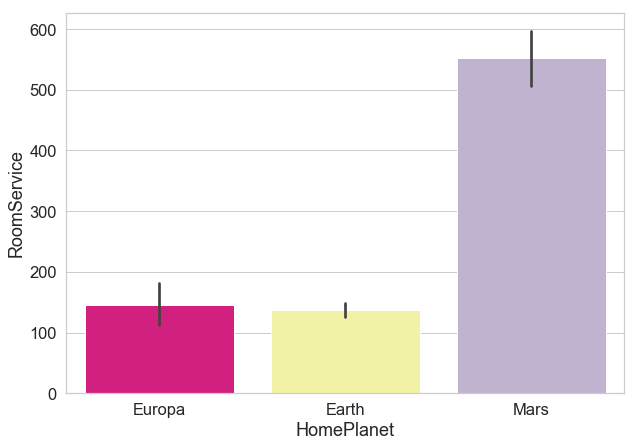

In [18]:
sns.set(palette='rainbow',font_scale=1.5,style = 'whitegrid',rc={"figure.figsize": [10, 7]})
sns.barplot(train_data['HomePlanet'],train_data['RoomService'],palette='Accent_r');

In [19]:
# OBSERVATION 
# The people having "Mars" as permanent residence are paying highest to RoomService on Spaceship

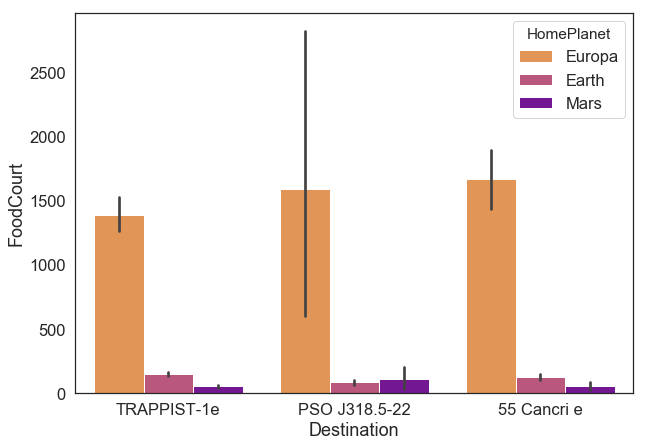

In [20]:
sns.set(palette='rainbow',font_scale=1.5,style = 'white',rc={"figure.figsize": [10, 7]})
sns.barplot(x =train_data['Destination'],y = train_data['FoodCourt'],hue=train_data['HomePlanet'],palette='plasma_r');

In [21]:
# OBSERVATION 
# The people having "Europa" as permanent residence("HomePlanet") are paying highest on FoodCourt in Spaceship whether 
# they are travelling to any of the 3 Destination Planets. 

### Scatter Plot - BiVariate Analysis

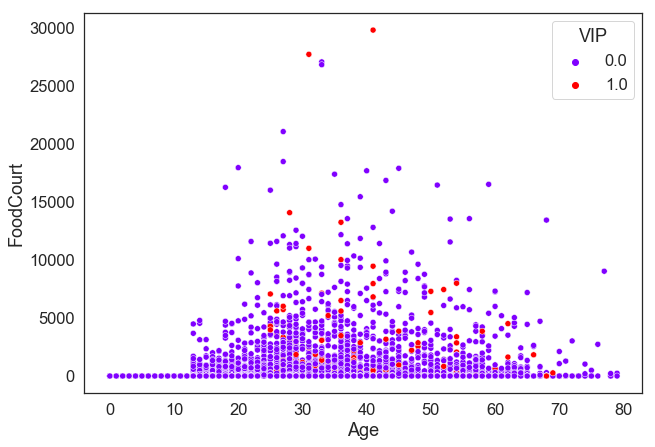

In [22]:
sns.scatterplot(train_data["Age"],train_data['FoodCourt'],hue=train_data['VIP'],palette='rainbow');

In [23]:
# OBSERVATION
# People of Age between 13 and 70 are billed almost similar i.e greater than 1$ and highest being a VIP paying approx 30000$.

### KDE Plot - Univariate Analysis

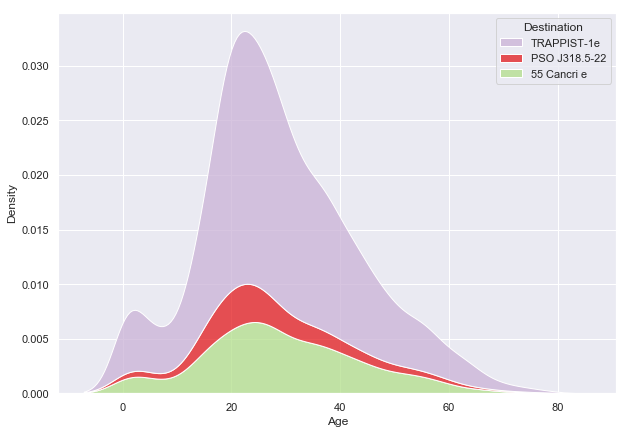

In [24]:
sns.set_theme(style='darkgrid')
sns.kdeplot(data=train_data,x = 'Age',hue = 'Destination',multiple='stack',palette='Paired_r')

In [25]:
# OBSERVATION
# Majority of People from all age groups are going to "TRAPPIST-1e" Planet

### Countplot - Relation Plot

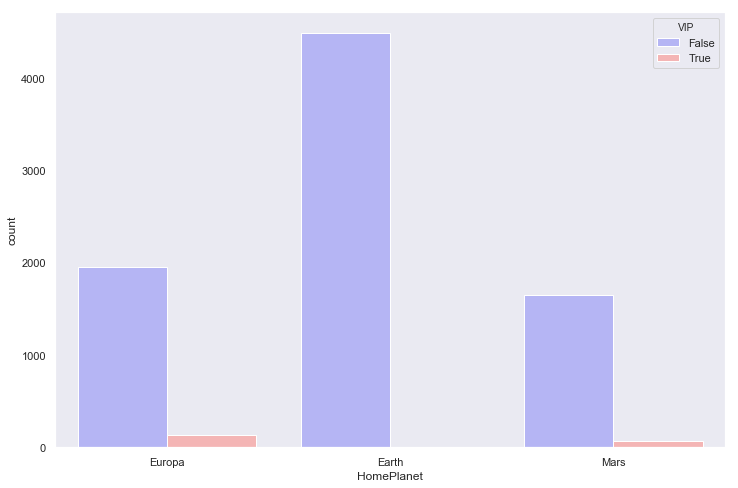

In [26]:
sns.set_theme(style='dark',rc={"figure.figsize": [12, 8]})
sns.countplot(train_data['HomePlanet'],hue=train_data['VIP'],palette='bwr');

### Pairplot - Mixed Plot

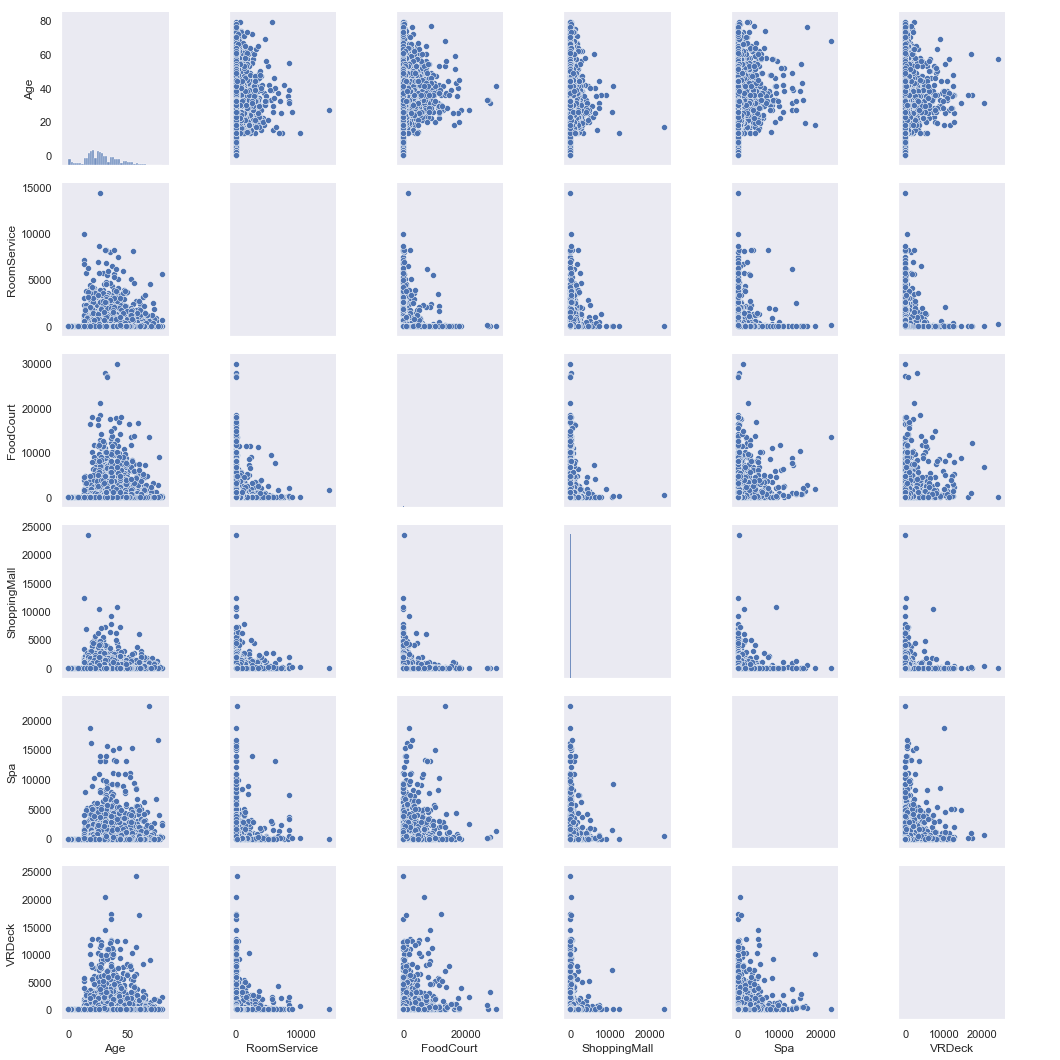

In [27]:
sns.pairplot(train_data[numerical_features],dropna=True);

## 5. Transforming the features to Normal/Gaussian using Log/Quantile Transformer and other ways

### Testing the results from Quantile Transformer and Power Transformer(Yeo - Johnson).

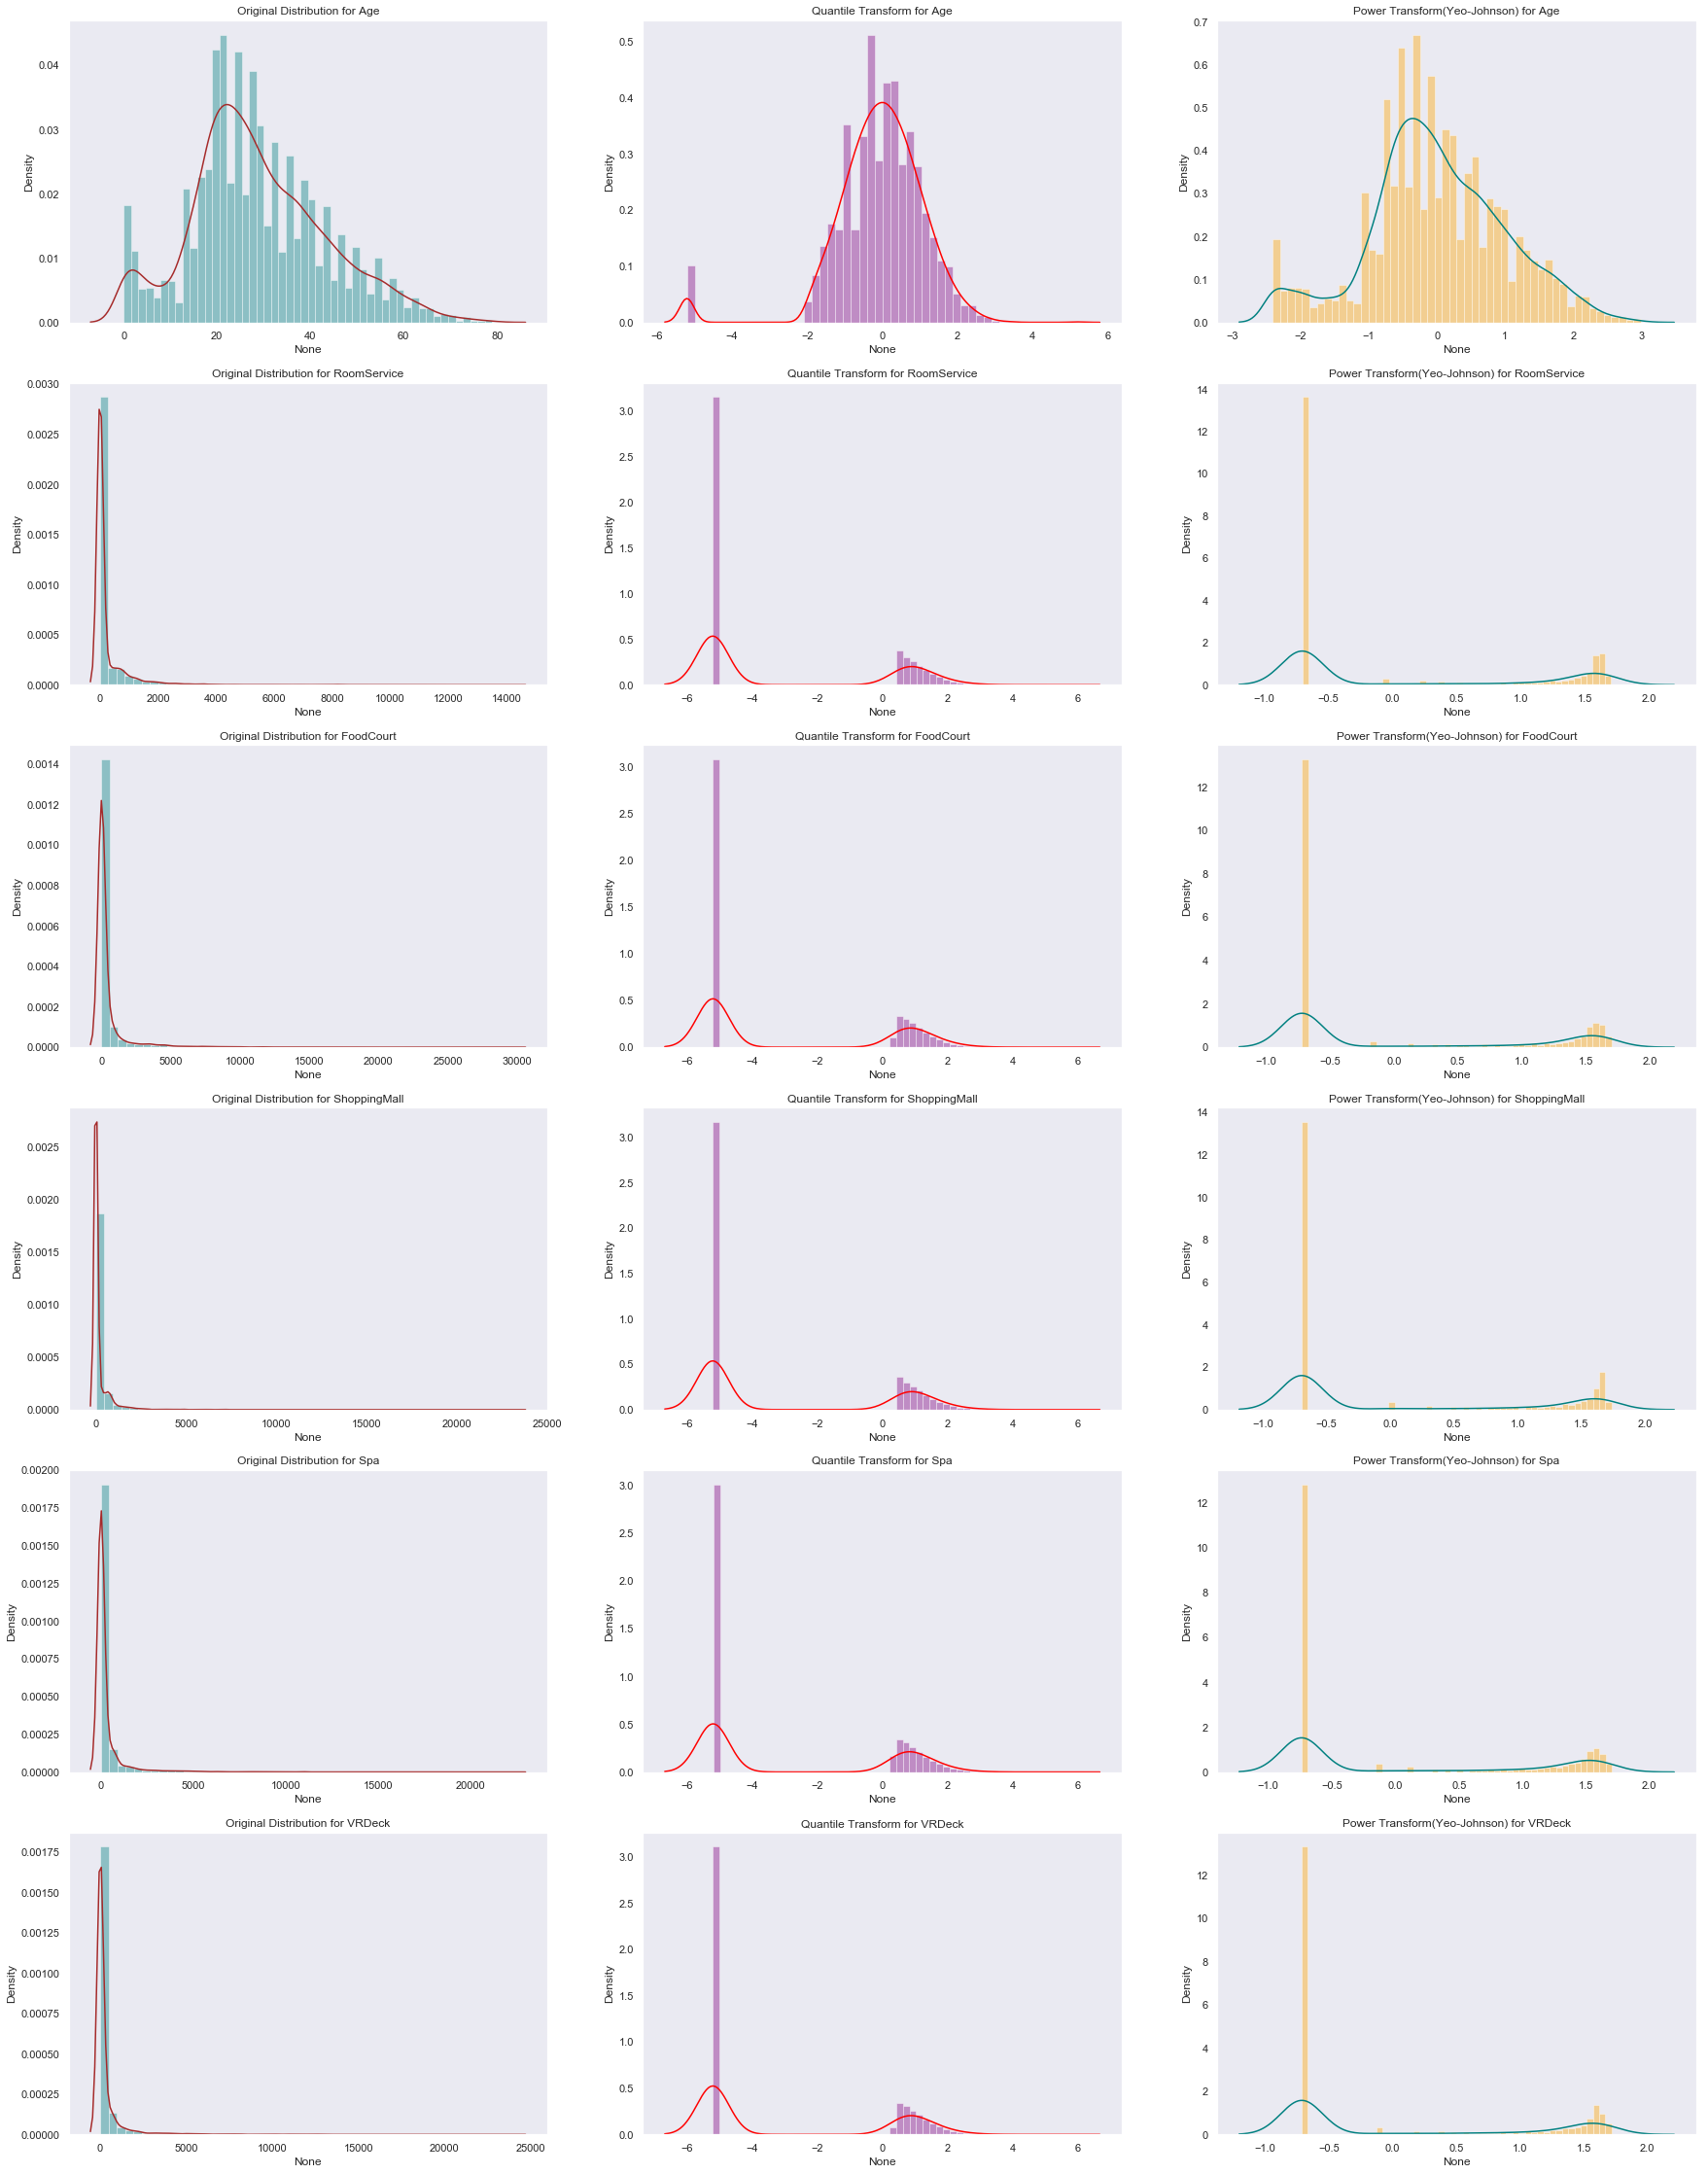

In [28]:
from sklearn.preprocessing import PowerTransformer,QuantileTransformer


def test_transformers(numerical_features):
    pt = PowerTransformer(method='yeo-johnson')
    qt = QuantileTransformer(output_distribution='normal')
    
    # Don't use output_distributions as "uniform" as it will give a uniform distribution not a Gaussian/Normal Distribution 
    
    fig = plt.figure(figsize=(30,40))
    j = 1
    for i in numerical_features:
        array = np.array(train_data[i]).reshape(-1, 1)
        y = pt.fit_transform(array)
        x = pd.DataFrame(qt.fit_transform(array))
        plt.subplot(6,3,j)
        sns.distplot(array, bins = 50, kde = True,color='teal',kde_kws={'color':'brown'})
        plt.title(f"Original Distribution for {i}")
        plt.subplot(6,3,j+1)
        sns.distplot(x, bins = 50, kde = True,color='purple',kde_kws={'color':'red'})
        plt.title(f"Quantile Transform for {i}")
        plt.subplot(6,3,j+2)
        sns.distplot(y, bins = 50, kde = True,color='orange',kde_kws={'color':'teal'})
        plt.title(f"Power Transform(Yeo-Johnson) for {i}")
        j += 3
        
test_transformers(numerical_features)


# OBSERVATIONS
# 1. Power transformer i.e yeo-johnson performs better than BOX-COX Transform as it can handle -ve values also.
# 2. Quantile Transformer is performing better than Yeo - Johnson Transform so taking it as our main Transformer.
# 3. We are not taking log transform here cause Quantile transformer was giving better results than all others.

### Transforming Numerical Features using Quantile Transformer and making close to "Normal" by this OUTLIERS are also been taken care of.

In [29]:
quant_trans = QuantileTransformer(output_distribution='normal')
for i in numerical_features:
    quant = quant_trans.fit(np.array(train_data[i]).reshape(-1, 1))
    train_data[i] = quant.transform(np.array(train_data[i]).reshape(-1, 1))
    test_data[i] = quant.transform(np.array(test_data[i]).reshape(-1,1))

## 6.   After Outlier Transformation check for Missing data in the new dataset 


In [30]:
train_data.isnull().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [31]:
train_data.isnull().sum().sum()
print('Percentage of missing data points : ',((train_data.isnull().sum().sum()*100)/train_data.shape[0]).round(4),"%")

Percentage of missing data points :  24.4335 %


In [32]:
test_data.isnull().sum().sum()
print('Percentage of missing data points : ',((test_data.isnull().sum().sum()*100)/test_data.shape[0]).round(4),"%")

Percentage of missing data points :  23.9186 %


In [33]:
for i in train_data.columns:
    print('Percentage of Missing values in each Feature  {0} : {1}'.format(i,((train_data[i].isnull().sum().sum()*100)/(train_data[i].shape[0])).round(4)),'%')

Percentage of Missing values in each Feature  HomePlanet : 2.3122 %
Percentage of Missing values in each Feature  CryoSleep : 2.4963 %
Percentage of Missing values in each Feature  Cabin : 2.2892 %
Percentage of Missing values in each Feature  Destination : 2.0936 %
Percentage of Missing values in each Feature  Age : 2.0591 %
Percentage of Missing values in each Feature  VIP : 2.3352 %
Percentage of Missing values in each Feature  RoomService : 2.0821 %
Percentage of Missing values in each Feature  FoodCourt : 2.1051 %
Percentage of Missing values in each Feature  ShoppingMall : 2.3927 %
Percentage of Missing values in each Feature  Spa : 2.1051 %
Percentage of Missing values in each Feature  VRDeck : 2.1627 %
Percentage of Missing values in each Feature  Transported : 0.0 %


## 7. Doing Imputation for missing data 

In [34]:
from sklearn.impute import SimpleImputer
from fancyimpute import IterativeImputer

In [35]:
#my_imputer_med = SimpleImputer(strategy='median')

fancy_imputer_mice = IterativeImputer()
my_imputer_mod = SimpleImputer(strategy='most_frequent')

In [36]:
for i in train_data.columns:
    if train_data[i].dtype == 'O':
        imp_mod = my_imputer_mod.fit(np.array(train_data[i]).reshape(-1, 1))
        train_data[i] = imp_mod.transform(np.array(train_data[i]).reshape(-1, 1))
        test_data[i] = imp_mod.transform(np.array(test_data[i]).reshape(-1, 1))
    elif train_data[i].dtype == 'float' or train_data[i].dtype == 'int':
        imp_fancymice = fancy_imputer_mice.fit(np.array(train_data[i]).reshape(-1, 1))
        train_data[i] = imp_fancymice.transform(np.array(train_data[i]).reshape(-1, 1))
        test_data[i] = imp_fancymice.transform(np.array(test_data[i]).reshape(-1, 1))

        
# OBSERVATION
# Imputing Missing values in Categorical Features using "most_frequent" aka mode() technique
# Imputing Missing values in Numerical Features using "median" technique

In [37]:
train_data.isnull().sum()
# As we see no NULL or NAN value is there in dataset

HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [38]:
test_data.isnull().sum()
# As we see no NULL or NAN value is there in dataset

HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

## 8. Doing Feature Engineering by creating 3 new features from given 1 feature i.e "Cabin"

In [39]:
train_data['Cabin'].replace(regex=True, inplace=True, to_replace=r'[@#&$%+-/*]', value=r'')
test_data['Cabin'].replace(regex=True, inplace=True, to_replace=r'[@#&$%+-/*]', value=r'')

In [40]:
train_data.head()
test_data.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Earth,True,G3S,TRAPPIST-1e,0.010037,False,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
1,Earth,False,F4S,TRAPPIST-1e,-0.718462,False,-5.199338,0.497809,-5.199338,1.905792,-5.199338
2,Europa,True,C0S,55 Cancri e,0.282216,False,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
3,Europa,False,C1S,TRAPPIST-1e,0.692715,False,-5.199338,2.186647,-5.199338,0.843291,1.161506
4,Earth,False,F5S,TRAPPIST-1e,-0.613509,False,0.542335,-5.199338,1.297975,-5.199338,-5.199338


In [41]:
def new_colums(data):
    
    first = []
    last = []
    for i in data['Cabin']:
        first.append(i[0])
        last.append(i[-1])

    data['Cabin_deck'] = pd.DataFrame(first)
    data['Cabin_side'] = pd.DataFrame(last)
    
    return data

new_colums(train_data)
new_colums(test_data)


,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_deck,Cabin_side
0,Earth,True,G3S,TRAPPIST-1e,0.010037,False,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,G,S
1,Earth,False,F4S,TRAPPIST-1e,-0.718462,False,-5.199338,0.497809,-5.199338,1.905792,-5.199338,F,S
2,Europa,True,C0S,55 Cancri e,0.282216,False,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,C,S
3,Europa,False,C1S,TRAPPIST-1e,0.692715,False,-5.199338,2.186647,-5.199338,0.843291,1.161506,C,S
4,Earth,False,F5S,TRAPPIST-1e,-0.613509,False,0.542335,-5.199338,1.297975,-5.199338,-5.199338,F,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,Earth,True,G1496S,TRAPPIST-1e,0.457033,False,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,G,S
4273,Earth,False,G734S,TRAPPIST-1e,0.910873,False,-5.199338,1.204928,0.628724,0.492137,0.831415,G,S
4274,Mars,True,D296P,55 Cancri e,-0.057659,False,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,D,P
4275,Europa,False,D297P,TRAPPIST-1e,-0.057659,False,-5.199338,1.636249,-5.199338,-5.199338,1.120370,D,P


In [42]:
train_data.shape

(8693, 14)

In [43]:
train_data['Cabin'].replace(regex=True, inplace=True, to_replace=r'[^0-9]', value=r'')
train_data['Cabin_num'] = train_data['Cabin'].astype(int)


test_data['Cabin'].replace(regex=True, inplace=True, to_replace=r'[^0-9]', value=r'')
test_data['Cabin_num'] = test_data['Cabin'].astype(int)

In [44]:
train_data = train_data.drop('Cabin',axis =1)
test_data = test_data.drop('Cabin',axis =1)

In [45]:
train_data = train_data[['HomePlanet', 'CryoSleep','Cabin_deck', 'Cabin_side', 'Cabin_num','Destination', 'Age', 'VIP',
                         'RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','Transported']]
test_data = test_data[['HomePlanet', 'CryoSleep','Cabin_deck', 'Cabin_side', 'Cabin_num','Destination', 'Age', 'VIP',
                         'RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]

In [46]:
train_data.head(10)
test_data.head(10)

,HomePlanet,CryoSleep,Cabin_deck,Cabin_side,Cabin_num,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Earth,True,G,S,3,TRAPPIST-1e,0.010037,False,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
1,Earth,False,F,S,4,TRAPPIST-1e,-0.718462,False,-5.199338,0.497809,-5.199338,1.905792,-5.199338
2,Europa,True,C,S,0,55 Cancri e,0.282216,False,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
3,Europa,False,C,S,1,TRAPPIST-1e,0.692715,False,-5.199338,2.186647,-5.199338,0.843291,1.161506
4,Earth,False,F,S,5,TRAPPIST-1e,-0.613509,False,0.542335,-5.199338,1.297975,-5.199338,-5.199338
5,Earth,False,F,P,7,TRAPPIST-1e,0.282216,False,-5.199338,1.446518,1.002886,0.762394,0.705530
6,Europa,True,B,P,2,55 Cancri e,-0.512061,False,-5.199338,-2.959480,-5.199338,-5.199338,-5.199338
7,Europa,True,D,S,0,TRAPPIST-1e,-0.613509,False,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
8,Europa,True,D,S,0,55 Cancri e,-0.321611,False,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
9,Earth,False,F,S,7,55 Cancri e,-0.227777,False,-5.199338,1.048955,-5.199338,-5.199338,-5.199338


## 9. Converting Categorical Features to Numerical using One Hot Encoding 

In [47]:
categorical_features.extend(['Cabin_deck','Cabin_side'])
categorical_features.remove('Cabin')

In [48]:
categorical_features

['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Cabin_deck', 'Cabin_side']

In [49]:
for i in categorical_features:
    print(train_data[i].unique())

['Europa' 'Earth' 'Mars']
[False True]
['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e']
[False True]
['B' 'F' 'A' 'G' 'E' 'D' 'C' 'T']
['P' 'S']


In [50]:
train_data['Cabin_deck'].value_counts()

F    2794
G    2758
E     876
B     779
C     747
D     478
A     256
T       5
Name: Cabin_deck, dtype: int64

In [51]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop='first',sparse=False)
ohe.fit(train_data[categorical_features])
ohe.categories_

train_data[['HomePlanet_Europa','HomePlanet_Earth','CryoSleep_True','Dest_PSO','Dest_Thrappist','VIP_True','Cabin_deck_B',
       'Cabin_deck_C','Cabin_deck_D','Cabin_deck_E','Cabin_deck_F','Cabin_deck_G','Cabin_deck_T','Cabin_side_S']] = pd.DataFrame(ohe.transform(train_data[categorical_features]))

test_data[['HomePlanet_Europa','HomePlanet_Earth','CryoSleep_True','Dest_PSO','Dest_Thrappist','VIP_True','Cabin_deck_B',
       'Cabin_deck_C','Cabin_deck_D','Cabin_deck_E','Cabin_deck_F','Cabin_deck_G','Cabin_deck_T','Cabin_side_S']] = pd.DataFrame(ohe.transform(test_data[categorical_features]))


In [52]:
train_data.drop(['HomePlanet','CryoSleep','Cabin_deck','Cabin_side','Destination','VIP','Cabin_deck_T'],axis = 1,inplace=True)
test_data.drop(['HomePlanet','CryoSleep','Cabin_deck','Cabin_side','Destination','VIP','Cabin_deck_T'],axis = 1,inplace=True)

In [53]:
train_data['Transported'] = pd.get_dummies(train_data['Transported'],drop_first=True)

In [54]:
train_data = train_data[['HomePlanet_Europa', 'HomePlanet_Earth',
       'CryoSleep_True', 'Dest_PSO', 'Dest_Thrappist', 'VIP_True',
       'Cabin_deck_B', 'Cabin_deck_C', 'Cabin_deck_D', 'Cabin_deck_E',
       'Cabin_deck_F', 'Cabin_deck_G', 'Cabin_side_S',
       'Cabin_num', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
       'VRDeck','Transported']]

test_data = test_data[['HomePlanet_Europa', 'HomePlanet_Earth',
       'CryoSleep_True', 'Dest_PSO', 'Dest_Thrappist', 'VIP_True',
       'Cabin_deck_B', 'Cabin_deck_C', 'Cabin_deck_D', 'Cabin_deck_E',
       'Cabin_deck_F', 'Cabin_deck_G', 'Cabin_side_S',
       'Cabin_num', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
       'VRDeck']]

In [55]:
train_data.head(7)

,HomePlanet_Europa,HomePlanet_Earth,CryoSleep_True,Dest_PSO,Dest_Thrappist,VIP_True,Cabin_deck_B,Cabin_deck_C,Cabin_deck_D,Cabin_deck_E,...,Cabin_deck_G,Cabin_side_S,Cabin_num,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0,0.749670,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0,-0.227777,0.767233,0.497809,0.667419,1.107059,0.670557,1
2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0,1.792374,0.664287,1.785832,-5.199338,2.490541,0.680013,0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0,0.403356,-5.199338,1.352207,1.092336,1.987460,0.877933,0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1,-1.018778,0.933872,0.667800,0.910960,1.121888,0.429351,1
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,1.027247,-5.199338,0.963521,-5.199338,0.944636,-5.199338,1
6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,2,-0.066541,0.661162,1.430380,0.494971,-5.199338,-5.199338,1


In [56]:
train_data.isnull().sum()

HomePlanet_Europa    0
HomePlanet_Earth     0
CryoSleep_True       0
Dest_PSO             0
Dest_Thrappist       0
VIP_True             0
Cabin_deck_B         0
Cabin_deck_C         0
Cabin_deck_D         0
Cabin_deck_E         0
Cabin_deck_F         0
Cabin_deck_G         0
Cabin_side_S         0
Cabin_num            0
Age                  0
RoomService          0
FoodCourt            0
ShoppingMall         0
Spa                  0
VRDeck               0
Transported          0
dtype: int64

In [57]:
test_data.isnull().sum()

HomePlanet_Europa    0
HomePlanet_Earth     0
CryoSleep_True       0
Dest_PSO             0
Dest_Thrappist       0
VIP_True             0
Cabin_deck_B         0
Cabin_deck_C         0
Cabin_deck_D         0
Cabin_deck_E         0
Cabin_deck_F         0
Cabin_deck_G         0
Cabin_side_S         0
Cabin_num            0
Age                  0
RoomService          0
FoodCourt            0
ShoppingMall         0
Spa                  0
VRDeck               0
dtype: int64

## 10.Checking Correlation between features

In [58]:
# Here I have taken 0.80 as the threshold for correlation between features

def correlation_check(train_data):
    highly_correlated = []
    for i in train_data.columns:
        for j in train_data.columns:
            if (train_data[i].corr(train_data[j]).round(4) > 0.80 or train_data[i].corr(train_data[j]).round(4) < -0.80) and i != j:
                highly_correlated.append(i,j)
                
                
    return highly_correlated
    
correlation_check(train_data)

if len(correlation_check(train_data)) == 0:
    print("There are no features that are highly correlated to each other")
else:
    print(correlation_check(train_data))

There are no features that are highly correlated to each other


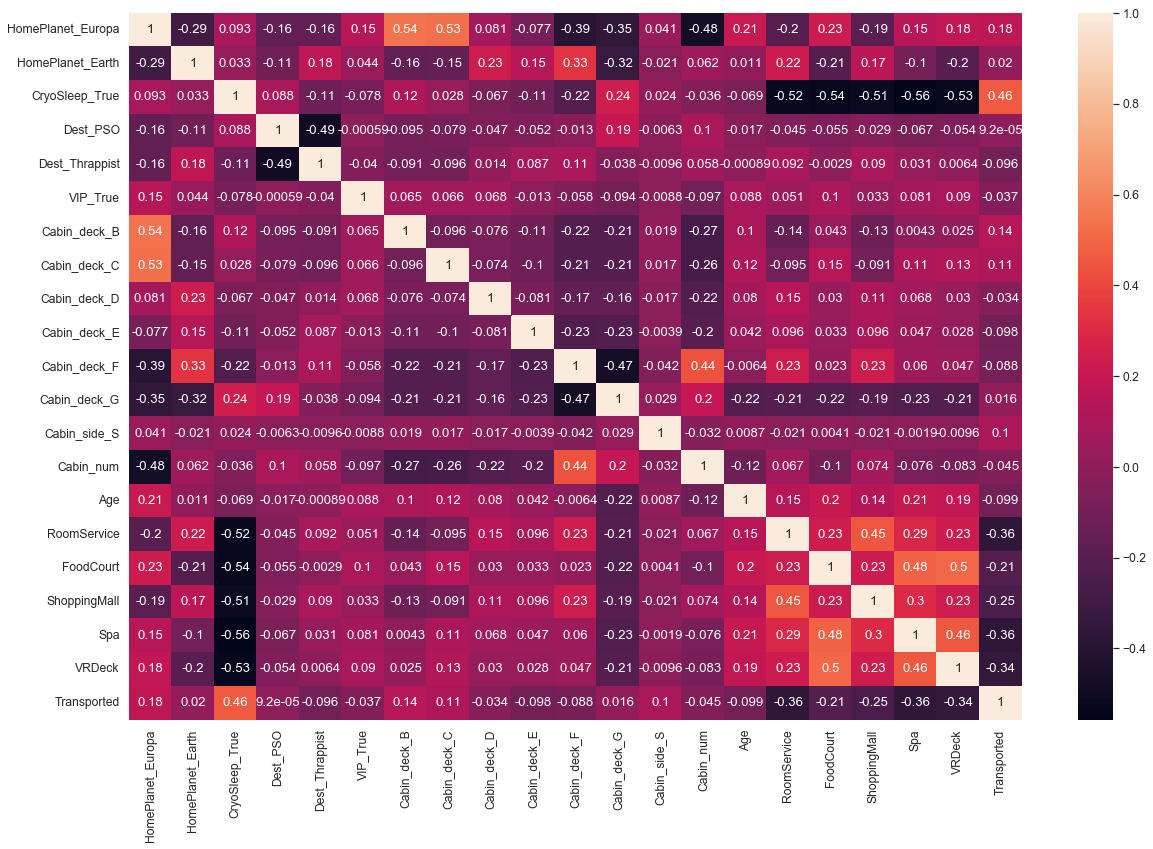

In [59]:
sns.set(palette='rainbow_r',font_scale=1.1,style = 'darkgrid',rc={"figure.figsize": [20, 13]})
sns.heatmap(train_data.corr(),annot=True);

In [60]:
X = train_data.drop('Transported',axis =1)
y = train_data['Transported']

## 11. Feature Importances and Feature Selection(INTRINSIC) - Here we are using Random Forest Classifier for both of them.

In [61]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X,y)

RandomForestClassifier(n_estimators=1000)

In [62]:
rf.score(X,y)

0.9994248245714943

In [63]:
rf.feature_importances_

array([0.02143869, 0.0141803 , 0.08786165, 0.00735578, 0.0140964 ,
       0.00222879, 0.00667484, 0.00688648, 0.00348162, 0.01166864,
       0.01342501, 0.01737981, 0.02096954, 0.1757629 , 0.12888986,
       0.0991124 , 0.08542571, 0.07570538, 0.10623388, 0.10122233])

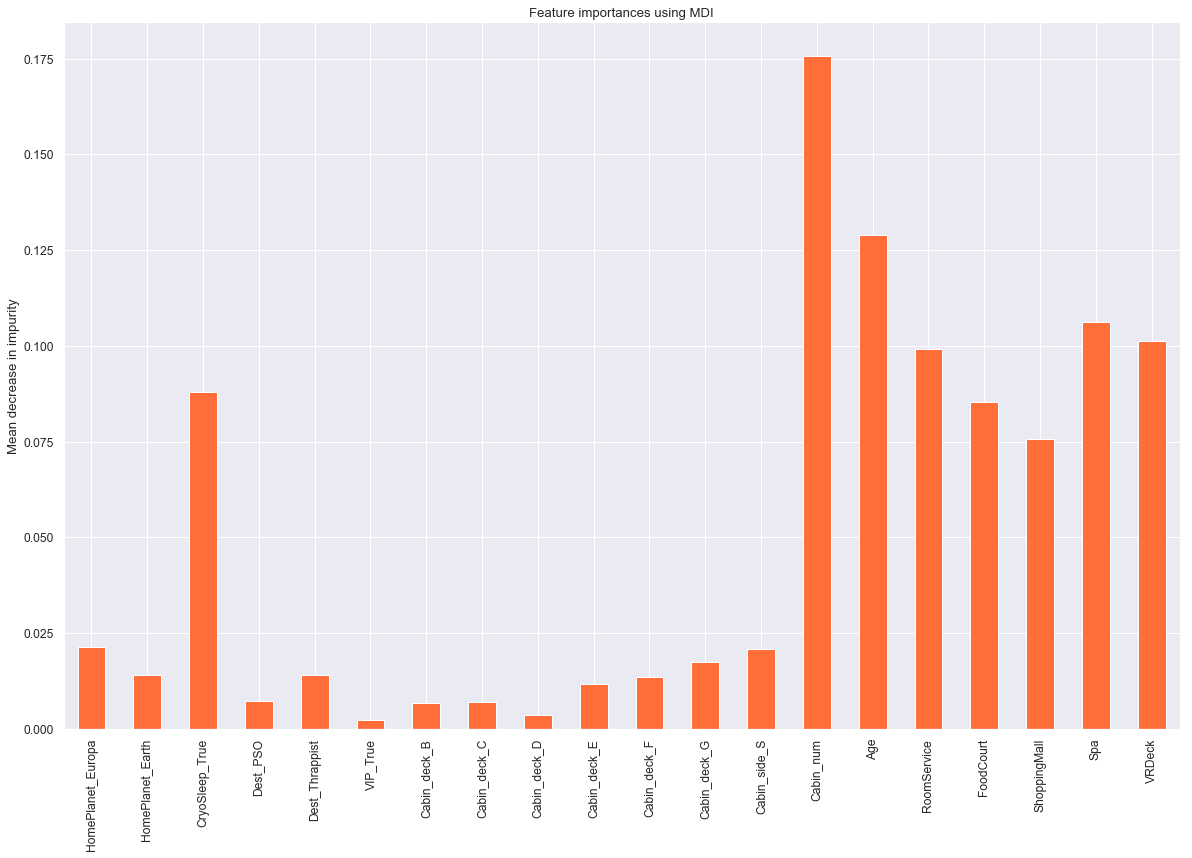

In [64]:
forest_importances = pd.Series(rf.feature_importances_, index=X.columns)
fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
plt.show()

## 12. Feature Selection

In [65]:
X_train = X.drop(['VIP_True','Dest_PSO','Cabin_deck_B','Cabin_deck_C','Cabin_deck_D'],axis=1)
X_test = test_data.drop(['VIP_True','Dest_PSO','Cabin_deck_B','Cabin_deck_C','Cabin_deck_D'],axis=1)

# OBSERVATION 
# Here we are removing features manually as Number of features are less in this case otherwise we would have made a fxn for this task

In [66]:
print(X_train.shape,X_test.shape)

(8693, 15) (4277, 15)


## 13. Doing Trial and Error for Model Building 

In [67]:
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import optuna

## 14. Model Building

In [79]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import VotingClassifier
import time
start_time = time.time()

knn = KNeighborsClassifier(n_neighbors=30,weights='distance',algorithm='kd_tree')
dt = DecisionTreeClassifier(criterion='gini',max_depth=40,max_features='sqrt')
rf = RandomForestClassifier(n_estimators=1588)
gbdt = GradientBoostingClassifier(n_estimators=3000,max_depth=12,subsample=0.75,learning_rate=0.03)
xgb = XGBClassifier(n_estimators = 1100, max_depth = 16, learning_rate = 0.75,eval_metric = 'logloss')
lgbm = LGBMClassifier(boosting_type='gbdt',learning_rate= 0.787,n_estimators=2200,num_leaves=33,max_depth=31)
cbc = CatBoostClassifier(silent=True,task_type='GPU',n_estimators=7000,max_depth=9,learning_rate=0.68,
                        bootstrap_type='Bayesian', bagging_temperature=7)

vc = VotingClassifier([('K-NN',knn),('DecisionTree', dt),('RandomForestClassifier',rf),('Gradient Boost',gbdt),
                       ('XG Boost', xgb),('LightGBM',lgbm),('CatboostClassifier',cbc)]
                     ,n_jobs = 4,verbose = 3)
vc.fit(X_train,y)

end_time = time.time()

In [80]:
print(r2_score(y_pred=vc.predict(X_train),y_true=y))
print(end_time-start_time)

0.9972390129304481
1056.3621997833252


In [81]:
result['Transported'] = vc.predict(X_test)

In [82]:
result['Transported'].replace(inplace=True, to_replace=(1,0), value=(True,False))

In [83]:
result.to_csv(r'C:\Users\trash\Downloads\Kaggle Datasets\SpaceShip Titanic\final_submission_Trash_Voting.csv',index=False)

# Score - 0.78816